In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten, Convolution2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
# os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0],True)
#if len(physical_devices) > 0:
#    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [3]:
img_array=cv2.imread('dataset/training_set/dogs/dog.2.jpg')

In [4]:
img_array.shape

(199, 187, 3)

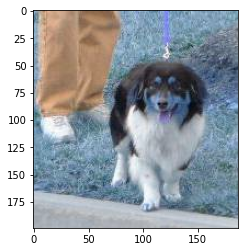

In [5]:
plt.imshow(img_array)

In [6]:
Classes={"dogs":1,"cats":0}

In [7]:
DataDirectory_train="dataset/training_set/" #Training Data
DataDirectory_test="dataset/test_set/" #Testing Data

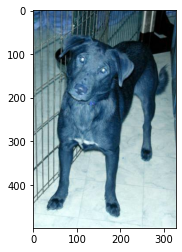

Class is: dogs


In [8]:
for cls in Classes:
        path=os.path.join(DataDirectory_train,cls) #Address of images of a class
        for img in os.listdir(path):
            
            img_array=cv2.imread(os.path.join(path,img))
            plt.imshow(img_array)
            plt.show()
            print("Class is: {}".format(cls))
            break
            #new_array=cv2.reshape(img_array,(img_size,img_size))
            #Training_Data.append([new_array,class_num])
        break

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('dataset/training_set',
                                                        target_size=(128, 128),
                                                        batch_size=10,
                                                        class_mode='binary')
validation_generator = test_datagen.flow_from_directory('dataset/test_set',
                                                            target_size=(128, 128),
                                                            batch_size=10,
                                                            class_mode='binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Building CNN + ANN (Model)

In [10]:
# Model Intiliazation
model=Sequential()
#Adding Convolution later with relu
model.add(Convolution2D(32,3,3,input_shape=(128,128,3),activation='relu'))

# Adding MaxPool Layer
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
## Adding Extra Conv Layers with MaxPool layer
model.add(Convolution2D(32,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

# Flattening the images to 1 D
model.add(Flatten())

#Full Connection
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 42, 42, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               36992     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [12]:
# Compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
model.fit_generator(
        train_generator,
        steps_per_epoch=400,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=100)

Epoch 1/20


c:\users\aman\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


400/400 [==============================] - 30s 68ms/step - loss: 0.6948 - accuracy: 0.5207 - val_loss: 0.6894 - val_accuracy: 0.5150
Epoch 2/20
400/400 [==============================] - 21s 53ms/step - loss: 0.6797 - accuracy: 0.5786 - val_loss: 0.6309 - val_accuracy: 0.6380
Epoch 3/20
400/400 [==============================] - 19s 49ms/step - loss: 0.6398 - accuracy: 0.6387 - val_loss: 0.6582 - val_accuracy: 0.5950
Epoch 4/20
400/400 [==============================] - 19s 47ms/step - loss: 0.6097 - accuracy: 0.6712 - val_loss: 0.6038 - val_accuracy: 0.6620
Epoch 5/20
400/400 [==============================] - 19s 48ms/step - loss: 0.6050 - accuracy: 0.6547 - val_loss: 0.6612 - val_accuracy: 0.6040
Epoch 6/20
400/400 [==============================] - 22s 55ms/step - loss: 0.5914 - accuracy: 0.6822 - val_loss: 0.5683 - val_accuracy: 0.6940
Epoch 7/20
400/400 [==============================] - 23s 57ms/step - loss: 0.5753 - accuracy: 0.6764 - val_loss: 0.5437 - val_accuracy: 0.7260
Epo

In [20]:
# Saving Model
model.save('Cat_Dog_model.h5')

##  Making Prediction

In [17]:
def result(directory):
    test_img=image.load_img(directory,target_size=(128,128))
    test_img=image.img_to_array(test_img)
    test_img=np.expand_dims(test_img,axis=0)
    pred=model.predict(test_img)
    if pred[0][0]==1:
        print('It is a Dog')
    else:
        print('it is a Cat')

In [23]:
directory='dataset/single_prediction/dog2.jpg'

In [24]:
result(directory)

It is a Dog
